In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/naukri2_job.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,Unnamed: 0,job_Role,company,reviews,experience,location,description
0,0,Senior Devops Engineer (ci/cd Bamboo),Cambridge Technology Enterprises Limited,3.7(30 reviews),4-9 yrs,"Mumbai, Bengaluru, Hyderabad, United States (U.S)","Maven, GIT, Continuous Integration, Ant, SVN, ..."
1,1,"Sales Officer/sales Reps- Agra, US Nagar & Mor...",Resinova Chemie Ltd,3.8(108 reviews),1-5 yrs,"Agra, Moradabad, US Nagar","fosrock, Moradabad, retail sales, adhe, araldi..."
2,2,Housekeeping and Restaurant Manager Food and B...,Antal International,3.9(12 reviews),2-7 yrs,"Canada, Dubai/ UAE, United States (U.S)","sous chef, chef, Room Attendant, housekeeping ..."
3,3,Front Office-hyatt Regency-denver -usa--12 Mon...,Vira International Ltd.,5.0(5 reviews),0-4 yrs,"Mumbai, United States (U.S), USA","Hospitality, f&b, Hotel Management, Front Offi..."
4,4,"Sales Executive, R&D and Quality Control Manager",Levanthrom Pharmaceutical Ltd,2-7 yrs,United States (U.S),"performance testing, automation testing, manua...",Responsibilities Providing direction on all bu...


In [1]:
df.columns

NameError: name 'df' is not defined

In [5]:
df.isnull().sum()

Unnamed: 0     0
job_Role       0
company        0
reviews        0
experience     0
location       0
description    0
dtype: int64

In [6]:
df.shape

(250, 7)

In [7]:
job_Role = df['job_Role'].dropna()

In [8]:
job_Role = job_Role.tolist() 

In [9]:
print(job_Role[0])

Senior Devops Engineer (ci/cd Bamboo)


In [10]:
print(len(job_Role))

250


In [11]:
def findJobCntonSkill(skill):
    requiredSkill = []
    for i in job_Role:
        if(skill in i):
            requiredSkill.append(i)
    return(len(requiredSkill))  

In [12]:
findJobCntonSkill("Design")

20

In [13]:
top5JobSkills = df['job_Role'].value_counts()
top5JobSkills[0:5]

Lead Aws/javascript Developer - Application Design & Implementation    10
BDM Informatica Developer - Big Data/hadoop                             5
Male DHA Registered Nurse                                               5
Ca/cwa/cs/m.com/mba(fin) Required                                       5
Civil Engineer, Electrical Engineer, Structural Engineer                5
Name: job_Role, dtype: int64

In [14]:
top10company = df['company'].value_counts()
top10company[0:10]

CN IMMIGRATION SERVICES             20
RAQMIYAT L.L.C                      20
ISYX TECHNOLOGIES LLC               10
Antal International                 10
A reputed Company in Dubai - UAE    10
Mount Talent Consulting             10
Confidential                        10
TransOrg Analytics                   5
Vira International Ltd.              5
SILA JEWELS LLC                      5
Name: company, dtype: int64

In [15]:
top10job_Role = df['job_Role'].value_counts()
top10job_Role[0:10]

Lead Aws/javascript Developer - Application Design & Implementation    10
BDM Informatica Developer - Big Data/hadoop                             5
Male DHA Registered Nurse                                               5
Ca/cwa/cs/m.com/mba(fin) Required                                       5
Civil Engineer, Electrical Engineer, Structural Engineer                5
Sales Officer/sales Reps- Agra, US Nagar & Moradabad                    5
Senior Officer HR                                                       5
SAP CRM Technical Consultant - Dubai Onsite                             5
Product Designer (ui/ux)                                                5
Sap Successfactors Consultant                                           5
Name: job_Role, dtype: int64

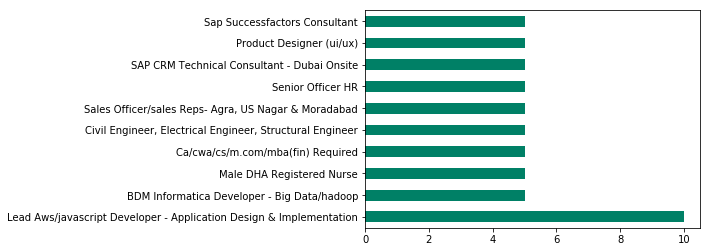

In [16]:
df['job_Role'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [17]:
top5Company = df['company'].value_counts()
top5Company = top5Company[0:5]
print(type(top5Company))

<class 'pandas.core.series.Series'>


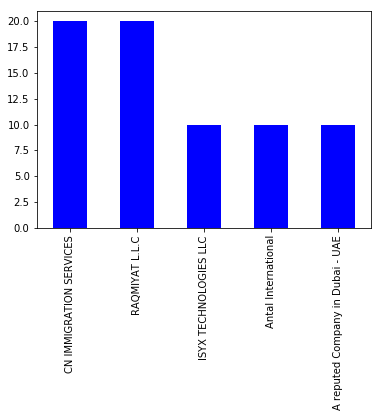

In [18]:
top5Company.plot.bar(stacked=True, colormap='winter')

In [19]:
top5ExperienceLevel = df['experience'].value_counts()
top5ExperienceLevel[0:5]

Dubai/ UAE             100
United States (U.S)     20
2-7 yrs                 15
3-8 yrs                 10
8-13 yrs                10
Name: experience, dtype: int64

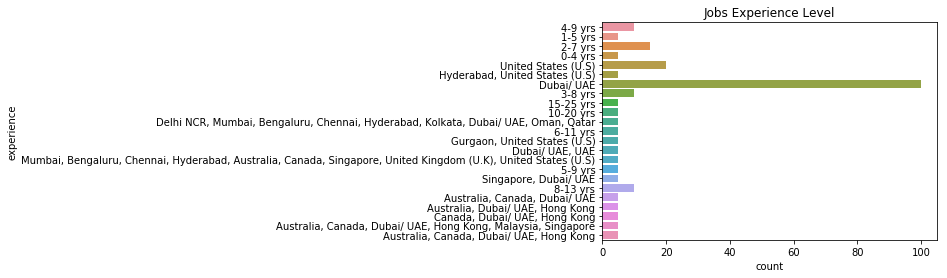

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="experience", data=df)
plt.title("Jobs Experience Level")

plt.show()

In [21]:
diffJobCategories= df['job_Role'].dropna()

In [22]:
diffJobCategories.value_counts()

Lead Aws/javascript Developer - Application Design & Implementation       10
BDM Informatica Developer - Big Data/hadoop                                5
Male DHA Registered Nurse                                                  5
Ca/cwa/cs/m.com/mba(fin) Required                                          5
Civil Engineer, Electrical Engineer, Structural Engineer                   5
Sales Officer/sales Reps- Agra, US Nagar & Moradabad                       5
Senior Officer HR                                                          5
SAP CRM Technical Consultant - Dubai Onsite                                5
Product Designer (ui/ux)                                                   5
Sap Successfactors Consultant                                              5
Sales Executive, R&D and Quality Control Manager                           5
Hiring For Nurses,radiographer in Singapore and Dubai                      5
Electrical Supervisor WITH GCC Experience                                  5

In [23]:
dfJobLocation = df['location'].value_counts()
dfJobLocation = dfJobLocation[0:10]

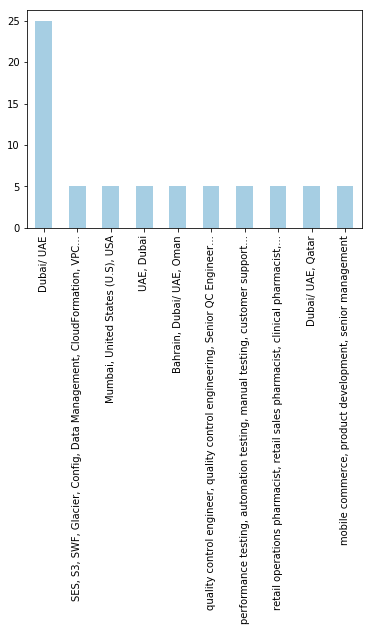

In [24]:
dfJobLocation.plot.bar(stacked=True, colormap='Paired')

In [25]:
#by_product_cat_subcat = df.groupby(['location'])
#by_product_cat_subcat

#df_Chennai = df['location'].groupby(df['job_Role'])

In [26]:
df_skill_loc = df.loc[df['location'] == 'City of UAE, Dubai']
df_skill_loc['job_Role'].value_counts(2)

Series([], Name: job_Role, dtype: float64)

In [27]:
dfcomp = df_skill_loc['company'].value_counts()
dfcomp[0:5]

Series([], Name: company, dtype: int64)

In [28]:
jobRole = df['job_Role'].value_counts()
jobRole[0:5]

Lead Aws/javascript Developer - Application Design & Implementation    10
BDM Informatica Developer - Big Data/hadoop                             5
Male DHA Registered Nurse                                               5
Ca/cwa/cs/m.com/mba(fin) Required                                       5
Civil Engineer, Electrical Engineer, Structural Engineer                5
Name: job_Role, dtype: int64

# Analysis of Company Data

In [31]:
JobSkills = df['job_Role'].dropna()

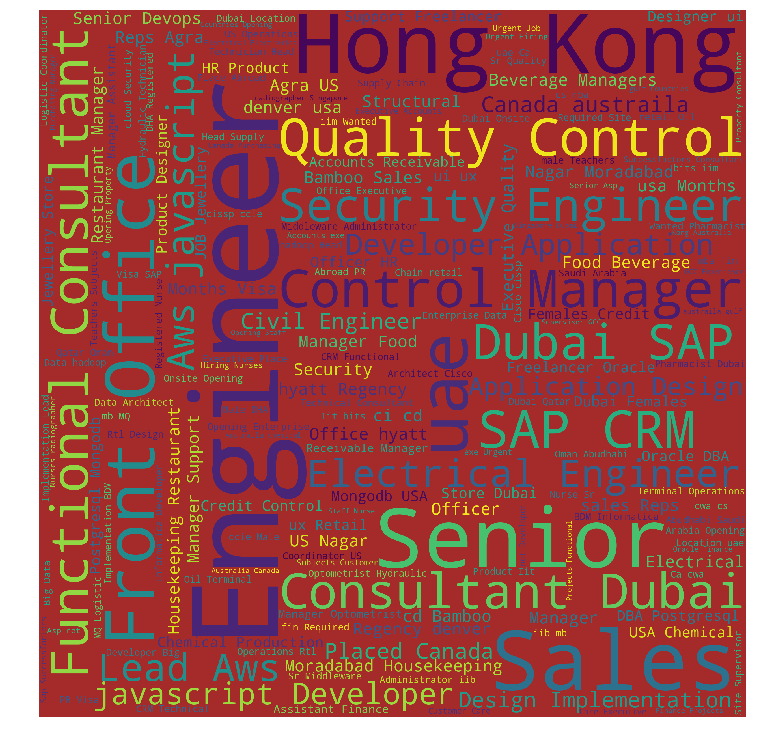

In [33]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(job_Role)

In [34]:
job_Role = df['job_Role'].dropna()

In [35]:
#job_Role=job_Role.tolist() 

In [36]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [38]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(job_Role))

print(data_words[:1])

[['senior', 'devops', 'engineer', 'ci', 'cd', 'bamboo']]


In [39]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['senior', 'devops', 'engineer', 'ci', 'cd', 'bamboo']


In [40]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [41]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['devop', 'ci', 'cd', 'bamboo'], ['sale', 'officer', 'sale', 'rep', 'nagar'], ['restaurant', 'manager', 'food', 'beverage', 'manager'], ['office', 'hyatt', 'regency', 'denver', 'usa', 'month', 'visa']]


In [42]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [43]:
id2word[0]

'bamboo'

In [44]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('bamboo', 1), ('cd', 1), ('ci', 1), ('devop', 1)],
 [('nagar', 1), ('officer', 1), ('rep', 1), ('sale', 2)],
 [('beverage', 1), ('food', 1), ('manager', 2), ('restaurant', 1)]]

# LDA for job_Role Data

In [45]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.117*"developer" + 0.078*"application" + 0.078*"implementation" + '
  '0.078*"design" + 0.078*"sale" + 0.040*"manager" + 0.040*"hyatt" + '
  '0.040*"denver" + 0.040*"regency" + 0.040*"office"'),
 (1,
  '0.058*"datum" + 0.058*"consultant" + 0.058*"architect" + 0.058*"oracle" + '
  '0.058*"finance" + 0.030*"enterprise" + 0.030*"location" + 0.030*"developer" '
  '+ 0.030*"successfactor" + 0.030*"uae"'),
 (2,
  '0.197*"engineer" + 0.060*"sale" + 0.060*"security" + 0.040*"site" + '
  '0.040*"dubai" + 0.040*"uae" + 0.040*"job" + 0.040*"officer" + 0.020*"kong" '
  '+ 0.020*"nurse"'),
 (3,
  '0.179*"manager" + 0.045*"account" + 0.045*"executive" + 0.045*"product" + '
  '0.023*"front" + 0.023*"visa" + 0.023*"office" + 0.023*"place" + '
  '0.023*"head" + 0.023*"operation"'),
 (4,
  '0.140*"dubai" + 0.071*"engineer" + 0.047*"operation" + 0.047*"manager" + '
  '0.047*"consultant" + 0.047*"crm" + 0.047*"sap" + 0.047*"nurse" + '
  '0.047*"kong" + 0.024*"qatar"')]


In [47]:
# Compute Model Perplexity and Coherence Score

In [48]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.126463051537673

Coherence Score:  0.5262898529966467


In [49]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.166316 -0.121580       1        1  26.015585
3      0.277337 -0.054355       2        1  22.797556
4     -0.150588 -0.151599       3        1  21.591238
1     -0.134515  0.275417       4        1  17.234486
0      0.174083  0.052116       5        1  12.361135, topic_info=   Category       Freq            Term      Total  loglift  logprob
26  Default  60.000000        engineer  60.000000  30.0000  30.0000
10  Default  50.000000         manager  50.000000  29.0000  29.0000
72  Default  18.000000       developer  18.000000  28.0000  28.0000
30  Default  41.000000           dubai  41.000000  27.0000  27.0000
7   Default  23.000000            sale  23.000000  26.0000  26.0000
60  Default  14.000000          design  14.000000  25.0000  25.0000
71  Default   9.000000     application   9.000000  24.0000  24.0000
73  Default   9.000000  implementation   9.000000  23.0000  23.0000
23  Default   9.000000          oracle   9.000000  22.0000  22.0000
52  Default   9.000000       architect   9.000000  21.0000  21.0000
53  Default   9.000000           datum   9.000000  20.0000  20.0000
37  Default   9.000000         finance   9.000000  19.0000  19.0000
67  Default  19.000000        security  19.000000  18.0000  18.0000
49  Default  23.000000      consultant  23.000000  17.0000  17.0000
50  Default   9.000000             crm   9.000000  16.0000  16.0000
51  Default  14.000000             sap  14.000000  15.0000  15.0000
35  Default  10.000000         account  10.000000  14.0000  14.0000
46  Default  10.000000       executive  10.000000  13.0000  13.0000
29  Default  10.000000         product  10.000000  12.0000  12.0000
44  Default  14.000000       operation  14.000000  11.0000  11.0000
18  Default   9.000000            visa   9.000000  10.0000  10.0000
15  Default   9.000000          office   9.000000   9.0000   9.0000
40  Default   9.000000            head   9.000000   8.0000   8.0000
81  Default  14.000000           nurse  14.000000   7.0000   7.0000
95  Default  14.000000            kong  14.000000   6.0000   6.0000
20  Default   9.000000         quality   9.000000   5.0000   5.0000
56  Default  14.000000             uae  14.000000   4.0000   4.0000
69  Default  10.000000            site  10.000000   3.0000   3.0000
33  Default  10.000000             job  10.000000   2.0000   2.0000
5   Default  10.000000         officer  10.000000   1.0000   1.0000
..      ...        ...             ...        ...      ...      ...
38   Topic5   0.170892      technician   5.320959  -1.3478  -6.4785
68   Topic5   0.170892             com   5.320959  -1.3478  -6.4785
22   Topic5   0.170892         support   5.320963  -1.3478  -6.4785
58   Topic5   0.170892              mq   5.320963  -1.3478  -6.4785
57   Topic5   0.170892   administrator   5.320963  -1.3478  -6.4785
21   Topic5   0.170892      freelancer   5.320963  -1.3478  -6.4785
24   Topic5   0.170892      postgresql   5.320963  -1.3478  -6.4785
75   Topic5   0.170892     informatica   5.320965  -1.3478  -6.4785
74   Topic5   0.170892          hadoop   5.320965  -1.3478  -6.4785
76   Topic5   0.170892            ccie   5.320965  -1.3478  -6.4785
87   Topic5   0.170892   successfactor   5.320965  -1.3478  -6.4785
78   Topic5   0.170892           cissp   5.320965  -1.3478  -6.4785
89   Topic5   0.170892         project   5.320965  -1.3478  -6.4785
77   Topic5   0.170892           cisco   5.320965  -1.3478  -6.4785
54   Topic5   0.170892      enterprise   5.320965  -1.3478  -6.4785
55   Topic5   0.170892        location   5.320965  -1.3478  -6.4785
30   Topic5   0.170896           dubai  41.585178  -3.4038  -6.4785
51   Topic5   0.170895             sap  14.350760  -2.3399  -6.4785
49   Topic5   0.170895      consultant  23.364849  -2.8273  -6.4785
50   Topic5   0.170895             crm   9.924067  -1.9711  -6.4785
95   Topic5   0.170893            kong  14.

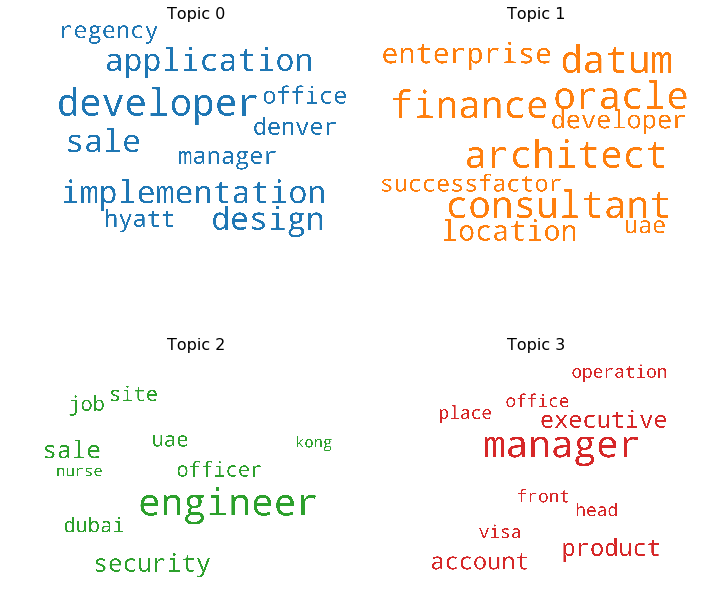

In [50]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [51]:
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [52]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [53]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.642644
1,0.010,6,0.590465
2,0.010,10,0.590243
3,0.010,15,0.590205
4,0.010,20,0.592009
5,0.100,2,0.662521
6,0.100,6,0.575960
7,0.100,10,0.576501
8,0.100,15,0.575727
9,0.100,20,0.591909


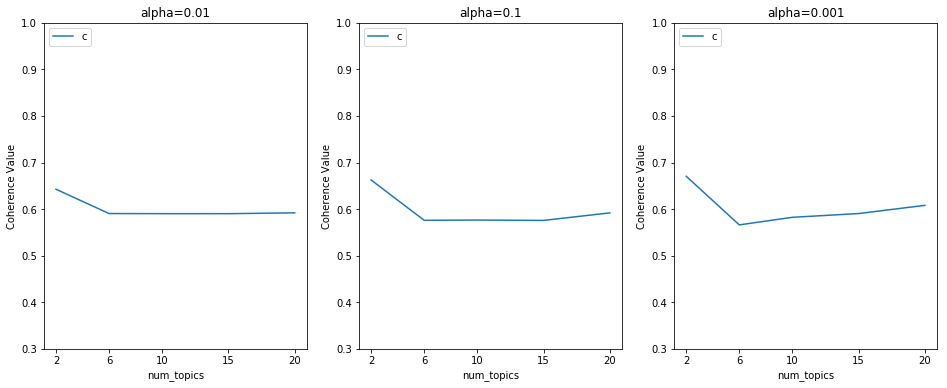

In [54]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [55]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [56]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.215*"control" + 0.215*"sale" + 0.215*"quality" + 0.108*"head" + '
  '0.108*"manager" + 0.001*"developer" + 0.001*"engineer" + 0.001*"hadoop" + '
  '0.001*"site" + 0.001*"informatica"'),
 (1,
  '0.108*"architect" + 0.108*"security" + 0.108*"cisco" + 0.108*"ccie" + '
  '0.108*"cissp" + 0.108*"oracle" + 0.108*"postgresql" + 0.108*"com" + '
  '0.001*"consultant" + 0.001*"sap"'),
 (2,
  '0.163*"engineer" + 0.163*"site" + 0.082*"dubai" + 0.082*"supervisor" + '
  '0.082*"store" + 0.082*"jewellery" + 0.082*"female" + 0.082*"sale" + '
  '0.082*"job" + 0.001*"design"'),
 (3,
  '0.160*"dubai" + 0.160*"consultant" + 0.160*"uae" + 0.160*"job" + '
  '0.160*"property" + 0.002*"security" + 0.002*"com" + 0.002*"site" + '
  '0.002*"cloud" + 0.002*"oman"'),
 (4,
  '0.098*"developer" + 0.098*"datum" + 0.098*"hadoop" + 0.098*"informatica" + '
  '0.098*"singapore" + 0.098*"coordinator" + 0.098*"dubai" + 0.098*"nurse" + '
  '0.098*"operation" + 0.001*"consultant"'),
 (5,
  '0.269*"manager" + 0.045*

In [57]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.122416444751951

Coherence Score:  0.5997515758127164


In [58]:
coherence_model_lda.get_coherence_per_topic()

[0.7121847670088753,
 0.6874190879364527,
 0.589435619871179,
 0.6770536163549621,
 0.5626492737629286,
 0.5797375867058018,
 0.45267596099660157,
 0.6005055285447182,
 0.6079853661224575,
 0.5774526192065559,
 0.6147643001153033,
 0.5647995887372441,
 0.6709494680927952,
 0.5730837614599426,
 0.525577092274929]

In [59]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.170905  0.199153       1        1  10.507357
6     -0.037559  0.067548       2        1   9.966314
7     -0.224033  0.095016       3        1   8.678253
9      0.133689 -0.267399       4        1   7.745073
13    -0.199177 -0.028067       5        1   7.240001
12     0.015299  0.039445       6        1   7.234224
14    -0.274036 -0.035196       7        1   7.168902
8      0.212404  0.047240       8        1   6.824368
2     -0.190830 -0.019940       9        1   6.649510
4      0.110639 -0.103731      10        1   5.208249
10     0.134368  0.179101      11        1   5.048705
1     -0.035520 -0.037385      12        1   4.839956
0      0.038229  0.236126      13        1   4.837906
11     0.076598 -0.186843      14        1   4.068297
3      0.069023 -0.185066      15        1   3.982882, topic_info=   Category       Freq            Term      Total  loglift  logprob
26  Default  57.000000        engineer  57.000000  30.0000  30.0000
10  Default  49.000000         manager  49.000000  29.0000  29.0000
7   Default  23.000000            sale  23.000000  28.0000  28.0000
49  Default  24.000000      consultant  24.000000  27.0000  27.0000
30  Default  42.000000           dubai  42.000000  26.0000  26.0000
67  Default  18.000000        security  18.000000  25.0000  25.0000
72  Default  18.000000       developer  18.000000  24.0000  24.0000
19  Default  14.000000         control  14.000000  23.0000  23.0000
60  Default  13.000000          design  13.000000  22.0000  22.0000
51  Default  14.000000             sap  14.000000  21.0000  21.0000
20  Default  10.000000         quality  10.000000  20.0000  20.0000
56  Default  15.000000             uae  15.000000  19.0000  19.0000
81  Default  14.000000           nurse  14.000000  18.0000  18.0000
44  Default  15.000000       operation  15.000000  17.0000  17.0000
33  Default  11.000000             job  11.000000  16.0000  16.0000
69  Default  10.000000            site  10.000000  15.0000  15.0000
93  Default  10.000000          canada  10.000000  14.0000  14.0000
37  Default   9.000000         finance   9.000000  13.0000  13.0000
50  Default  10.000000             crm  10.000000  12.0000  12.0000
73  Default   9.000000  implementation   9.000000  11.0000  11.0000
71  Default   9.000000     application   9.000000  10.0000  10.0000
46  Default  10.000000       executive  10.000000   9.0000   9.0000
15  Default  10.000000          office  10.000000   8.0000   8.0000
18  Default  10.000000            visa  10.000000   7.0000   7.0000
52  Default  10.000000       architect  10.000000   6.0000   6.0000
23  Default   9.000000          oracle   9.000000   5.0000   5.0000
40  Default   9.000000            head   9.000000   4.0000   4.0000
86  Default   6.000000        property   6.000000   3.0000   3.0000
53  Default   9.000000           datum   9.000000   2.0000   2.0000
95  Default  14.000000            kong  14.000000   1.0000   1.0000
..      ...        ...             ...        ...      ...      ...
66  Topic15   0.075305           cloud   5.127609  -0.9977  -6.1654
57  Topic15   0.075305   administrator   5.155268  -1.0031  -6.1654
58  Topic15   0.075305              mq   5.155268  -1.0031  -6.1654
61  Topic15   0.075305             bit   5.155274  -1.0031  -6.1654
11  Topic15   0.075305      restaurant   5.155274  -1.0031  -6.1654
9   Topic15   0.075305            food   5.155274  -1.0031  -6.1654
8   Topic15   0.075305        beverage   5.155274  -1.0031  -6.1654
63  Topic15   0.075305          arabia   5.155275  -1.0031  -6.1654
64  Topic15   0.075305            oman   5.155275  -1.0031  -6.1654
65  Topic15   0.075305           qatar   5.155275  -1.0031  -6.1654
36  Topic15   0.075305          credit   5.155275  -1.0031  -6.1654
42  Topic15   0.075305          supply   5.165956  -1.0051  -6.1654
39  Topic15   0.075305           chain   5.1659

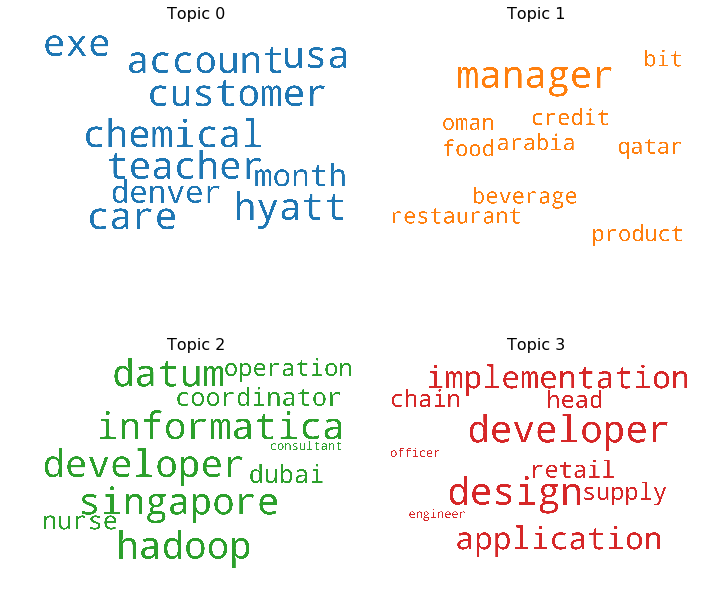

In [60]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()